# Sales Analysis

#### Import Necessary Libraries

In [1]:
%config Completer.use_jedi = True 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import os 

#### Merging 12 Months Data into a Single CSV File

In [2]:
# Take all the file names 
files = [file for file in os.listdir('./Sales_Data')]
all_months_data = pd.DataFrame() 
for file in files: 
    # print(file) 
    df = pd.read_csv("./Sales_Data/" + file) 
    # Convatenate all the file data in a single dataframe 
    all_months_data = pd.concat([all_months_data , df]) 
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [3]:
# Create a folder where we will save the all_months data 
output_folder_name = 'MergedData' 
os.makedirs(output_folder_name , exist_ok = True) 

In [4]:
# Now make a file with aall_months_data 
all_months_data.to_csv('./MergedData/all_data.csv' , index = False)

In [5]:
all_months_data.head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Read in updated DataFrame[new all data CSV file]

In [6]:
all_months_data = pd.read_csv('./MergedData/all_data.csv')
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### What was the best month for sales? How much was earned that month 

In [7]:
all_months_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


#### As Order Date is a Datetime data but it is in Object(string) form so convert it into DateTime

In [8]:
all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'] , errors = 'coerce')

C:\Users\tipto\AppData\Local\Temp\ipykernel_11720\3983172858.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'] , errors = 'coerce')


In [9]:
all_months_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [10]:
# Step 1: Convert to datetime (initial conversion)
all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'], errors='coerce')

# Step 2: Format to a single string format (optional, for display purposes)
all_months_data['Order Date'] = all_months_data['Order Date'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Step 3: Convert it back to datetime after formatting (to ensure it's datetime64 again)
all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'], format='%Y-%m-%d %H:%M:%S')

# Check the result
print(all_months_data['Order Date'].dtypes)


datetime64[ns]


In [11]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaT,NaN
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"


#### Add new column Month 

In [12]:
all_months_data['Order Month'] = all_months_data['Order Date'].dt.strftime('%b') 

In [13]:
all_months_data.tail(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
186840,259349,AAA Batteries (4-pack),1,2.99,2019-09-01 22:14:00,"911 River St, Dallas, TX 75001",Sep
186841,259350,Google Phone,1,600,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",Sep
186842,259350,USB-C Charging Cable,1,11.95,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",Sep
186843,259351,Apple Airpods Headphones,1,150,2019-09-01 19:43:00,"981 4th St, New York City, NY 10001",Sep
186844,259352,USB-C Charging Cable,1,11.95,2019-09-07 15:49:00,"976 Forest St, San Francisco, CA 94016",Sep
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep
186849,259357,USB-C Charging Cable,1,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016",Sep


### Clean Up The Data

#### Drop Rows where all the values are NaN

In [14]:
# Drop all the rows where all cols are NaN [As we want to drop rows so we pass axis = 0] 
all_months_data.dropna(how = 'all' , axis = 0 , inplace = True)  

In [15]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep


In [16]:
all_months_data['Price Each'].unique()

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', 'Price Each', '700.0', '1700.0',
       '150.0', '300.0', '400.0'], dtype=object)

In [17]:
# Lets see these rows 
dublicate_headers = all_months_data[all_months_data['Price Each'] == 'Price Each']
dublicate_headers

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
519,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
1149,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
1155,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
2878,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
2893,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
185551,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
186563,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
186632,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN


In [18]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr


#### Convert the Price Each col from string to float/numerical data

In [19]:
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'] , errors = 'coerce')

In [20]:
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  186305 non-null  object        
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
 6   Order Month       185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 11.4+ MB


#### Convert 'Quantity Ordered' from string to int

In [21]:
"""""
# Step-1: Convert string to neumeric
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'] , errors = 'coerce')
# Step-2: Convert neumeric(default is float) to int
all_months_data['Quantity Ordered'].astype('int32')
""" 

'""\n# Step-1: Convert string to neumeric\nall_months_data[\'Quantity Ordered\'] = pd.to_numeric(all_months_data[\'Quantity Ordered\'] , errors = \'coerce\')\n# Step-2: Convert neumeric(default is float) to int\nall_months_data[\'Quantity Ordered\'].astype(\'int32\')\n'

#### Convert the Quantity Ordered into neumeric data 

In [22]:
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'] , errors = 'coerce')

### Add new column named Total Sale[Sales = price Each * Quantity Ordered]

In [23]:
all_months_data['Sales'] = all_months_data['Price Each'] * all_months_data['Price Each']

In [24]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,142.8025
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,9998.0001
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,360000.0000
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,143.7601
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,143.7601


In [25]:
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
 6   Order Month       185950 non-null  object        
 7   Sales             185950 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 12.8+ MB


#### Have a look on NaN price cols

In [26]:
all_months_data[all_months_data['Quantity Ordered'] == 0]
# No columns

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales


#### Now we can find the month with best Sales and also the amount of sale 

In [27]:
# Group date based on month and apply sum on price 
res = all_months_data.groupby(by = 'Order Month')['Sales'].sum().sort_values(ascending = False)
res.head(1)

Order Month
Dec    3.610785e+09
Name: Sales, dtype: float64

#### Let's See the Graph for Sales and Month 
As we have a Categorical Data and a number data best choice is to use Bar plot

In [28]:
print(res.index)
print(res.values)

Index(['Dec', 'Oct', 'Apr', 'May', 'Nov', 'Mar', 'Jul', 'Jun', 'Aug', 'Feb',
       'Sep', 'Jan'],
      dtype='object', name='Order Month')
[3.61078481e+09 2.94410489e+09 2.61902475e+09 2.53728194e+09
 2.49211660e+09 2.17870609e+09 2.06948813e+09 2.02203499e+09
 1.73605677e+09 1.67101299e+09 1.62896866e+09 1.39976541e+09]


In [29]:
res 

Order Month
Dec    3.610785e+09
Oct    2.944105e+09
Apr    2.619025e+09
May    2.537282e+09
Nov    2.492117e+09
Mar    2.178706e+09
Jul    2.069488e+09
Jun    2.022035e+09
Aug    1.736057e+09
Feb    1.671013e+09
Sep    1.628969e+09
Jan    1.399765e+09
Name: Sales, dtype: float64

<Axes: xlabel='Order Month'>

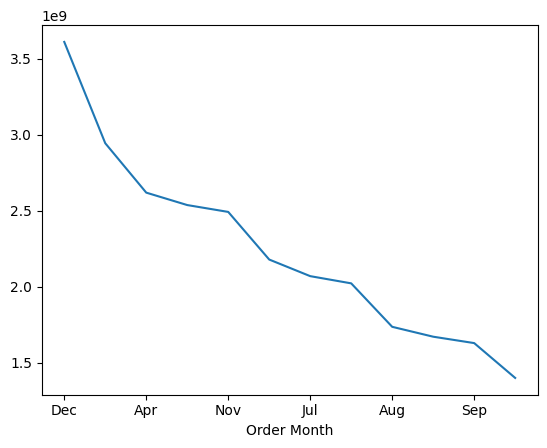

In [30]:
res.plot()

In [31]:
type(res)

pandas.core.series.Series

In [32]:
res = res.reset_index()

In [33]:
type(res) 

pandas.core.frame.DataFrame

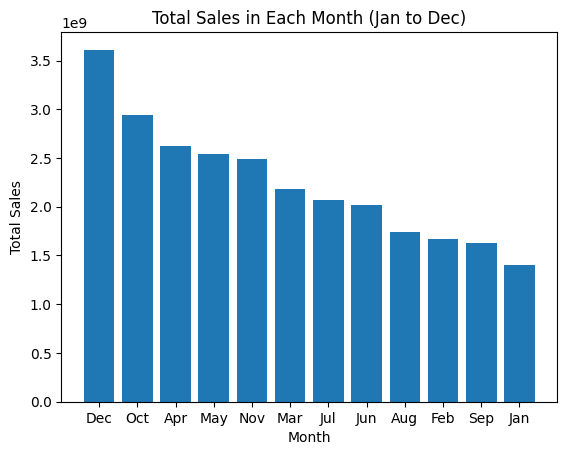

In [35]:
plt.bar(x = res['Order Month'] , height = res['Sales'])
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales in Each Month (Jan to Dec)')
plt.show() 

### Question-2: What City had the highest number of Sales

#### Task-4: Add a City Column 

In [39]:
# all_months_data.drop(columns = ['City'] , inplace = True)

In [37]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,142.8025
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,9998.0001
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,360000.0000
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,143.7601
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,143.7601


### Now add City

In [41]:
# Function to get the city 
def get_city(address): 
    # Check address aleast have this format-> location , city_name , state 
    try:
        return address.split(',')[1].strip()
    except IndexError: 
        return 'Unknown City'
def get_state(address): 
    try: 
        return address.split(',')[2].split(' ')[1].strip()
    except IndexError: 
        return 'Unknown State'

all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: f"{get_city(x)}({get_state(x)})") 
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,142.8025,Dallas(TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,9998.0001,Boston(MA)
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,360000.0000,Los Angeles(CA)
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,143.7601,Los Angeles(CA)
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,143.7601,Los Angeles(CA)


In [42]:
all_city_with_total_sales = all_months_data.groupby(by = 'City')['Sales'].sum()
all_city_with_total_sales 

City
Atlanta(GA)                    2.185486e+09
Austin(TX)                     1.420863e+09
Boston(MA)                     2.813723e+09
Dallas(TX)                     2.171570e+09
Los Angeles(CA)                4.261742e+09
New York City(NY)              3.668000e+09
Portland(ME)                   3.501527e+08
Portland(OR)                   1.493254e+09
San Francisco(CA)              6.441171e+09
Seattle(WA)                    2.103383e+09
Unknown City(Unknown State)    0.000000e+00
Name: Sales, dtype: float64

In [43]:
all_city_with_total_sales.index

Index(['Atlanta(GA)', 'Austin(TX)', 'Boston(MA)', 'Dallas(TX)',
       'Los Angeles(CA)', 'New York City(NY)', 'Portland(ME)', 'Portland(OR)',
       'San Francisco(CA)', 'Seattle(WA)', 'Unknown City(Unknown State)'],
      dtype='object', name='City')

In [44]:
all_city_with_total_sales.values 

array([2.18548616e+09, 1.42086289e+09, 2.81372320e+09, 2.17157010e+09,
       4.26174199e+09, 3.66800013e+09, 3.50152679e+08, 1.49325428e+09,
       6.44117146e+09, 2.10338315e+09, 0.00000000e+00])

In [48]:
type(all_city_with_total_sales)
# Convert it into series to DataFrame 
all_city_with_total_sales = all_city_with_total_sales.reset_index()
type(all_city_with_total_sales) 

pandas.core.frame.DataFrame

In [49]:
sorted_city = all_city_with_total_sales.sort_values(by = 'City' , ascending = True)

#### Plot City v/s Sales

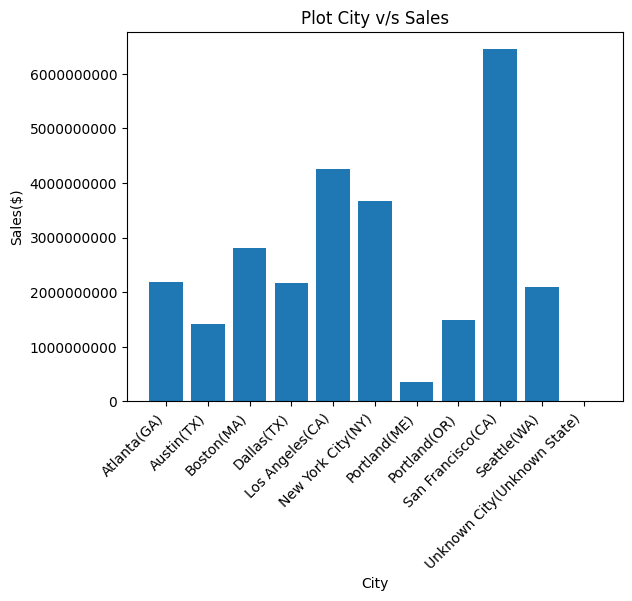

In [50]:
plt.bar(x = sorted_city['City'] , height = sorted_city['Sales'])
plt.xticks(rotation = 45 , ha = 'right')
plt.title('Plot City v/s Sales')
plt.xlabel('City')
plt.ylabel('Sales($)')
# Change y-axis to display plain numbers 
plt.ticklabel_format(style = 'plain' , axis = 'y')
plt.show()

### Question-3: At what time of day are customers most likely to make purchases?

In [51]:
all_months_data['Hour'] = all_months_data['Order Date'].dt.hour
all_months_data['Minute'] = all_months_data['Order Date'].dt.minute
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,142.8025,Dallas(TX),8.0,46.0
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,9998.0001,Boston(MA),22.0,30.0
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,360000.0000,Los Angeles(CA),14.0,38.0
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,143.7601,Los Angeles(CA),14.0,38.0
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,143.7601,Los Angeles(CA),9.0,27.0


#### Groupping based on Hour

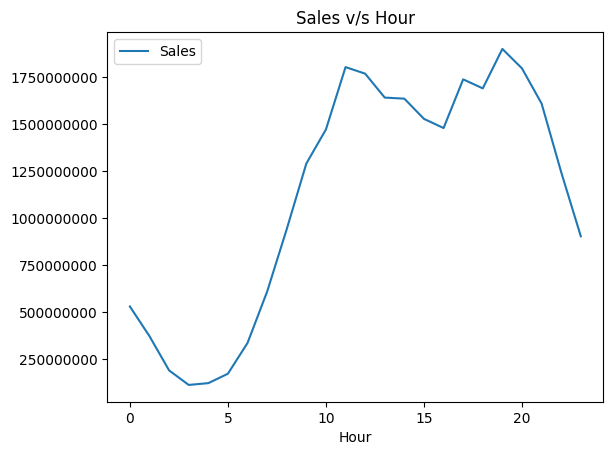

In [65]:
hourly_sales = all_months_data.groupby(by = 'Hour')['Sales'].sum()

# Convert hhourly_sales into a dataframe 
hourly_sales = hourly_sales.reset_index()
hourly_sales.set_index('Hour' , inplace = True)  # removing DataFrame's default index by Hour

# Now Plot a Bar chart to  see 
hourly_sales.plot()
plt.ticklabel_format(axis = 'y' , style = 'plain')
plt.title('Sales v/s Hour')
plt.show()

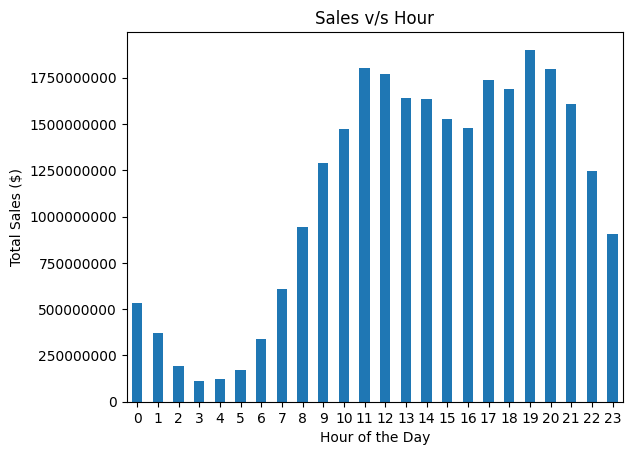

In [67]:
hourly_sales = all_months_data.groupby(by = 'Hour')['Sales'].sum()

# Convert hhourly_sales into a dataframe 
hourly_sales = hourly_sales.reset_index()
hourly_sales.set_index('Hour' , inplace = True)  # removing DataFrame's default index by Hour

# Ensure all the Hour is shown from 0-23
all_hours = pd.DataFrame({'Hour': range(24)}) 

# Now do left join based on Hour so [Left join cause we want all hours no matter there is sell happens or not] 
hourly_sales = pd.merge(left = all_hours , right = hourly_sales , on = 'Hour' , how = 'left')

# If there is any NaN value[means no sell fill it with 0]
hourly_sales['Sales'] = hourly_sales['Sales'].fillna(0)

# Set Hour As index 
hourly_sales.set_index('Hour' , inplace = True)

# Plot the bar chart
hourly_sales.plot(kind='bar', legend=False)
plt.ticklabel_format(axis='y', style='plain')  # to avoid scientific notation
plt.title('Sales v/s Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)  # Optional: Rotate the x-axis labels for better readability
plt.show()


### Making a Sales and Day Moment Pie Chart 

In [68]:
# Define a function to categorize hours into parts of the day
def get_time_part(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [69]:
all_months_data['Time Part'] = all_months_data['Hour'].apply(get_time_part)
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City,Hour,Minute,Time Part
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,142.8025,Dallas(TX),8.0,46.0,Morning
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,9998.0001,Boston(MA),22.0,30.0,Night
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,360000.0000,Los Angeles(CA),14.0,38.0,Afternoon
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,143.7601,Los Angeles(CA),14.0,38.0,Afternoon
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,143.7601,Los Angeles(CA),9.0,27.0,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep,8.9401,Los Angeles(CA),20.0,56.0,Evening
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep,490000.0000,San Francisco(CA),16.0,0.0,Afternoon
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep,490000.0000,San Francisco(CA),7.0,39.0,Morning
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep,144392.4001,San Francisco(CA),17.0,30.0,Evening


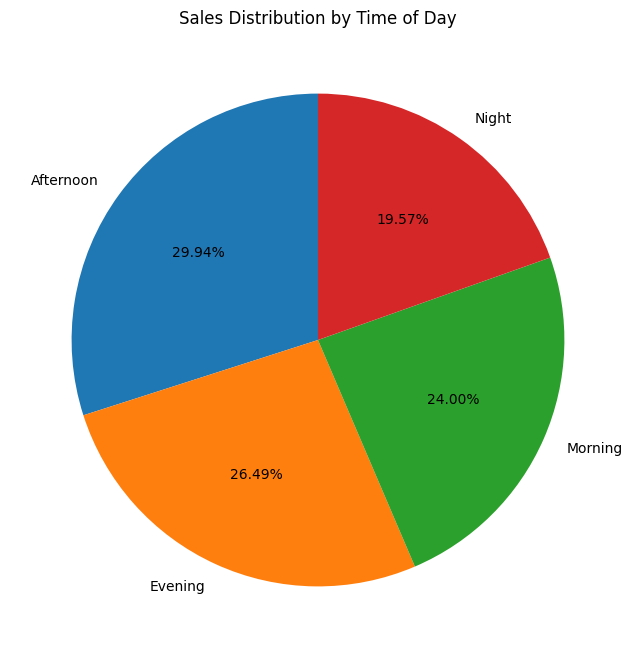

In [74]:
# Group Based on Time Part and Find the Sale amount 
sales_by_time_part = all_months_data.groupby(by = 'Time Part')['Sales'].sum()

plt.figure(figsize = (8 , 8))
sales_by_time_part.plot(kind = 'pie' , autopct = '%0.2f%%' , startangle = 90 , legend = False) 
plt.title('Sales Distribution by Time of Day')
plt.ylabel('')  # To remove the y-label (because it's unnecessary for pie chart)
plt.show()

## Question-4: What products are most often sold together

In [77]:
# Filter rows where the samae Oder ID is present more than once 
df = all_months_data[all_months_data['Order ID'].duplicated(keep = False)]

# Group data based on Order id if same Order id then take the product and concatenate them together 
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Drop dublicate rows (keeping one instance per order)
df = df[['Order ID' , 'Grouped']].drop_duplicates()
df 

C:\Users\tipto\AppData\Local\Temp\ipykernel_11720\3125368702.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [80]:
from itertools import combinations
from collections import Counter

# count the pairs that are bought together
count = Counter()

for row in df['Grouped']: 
    # Split the product name 
    products = row.split(',')
    combinations_list = combinations(products , 2) # we want pair of product so 2
    count.update(combinations_list)
    
# Most common 10 pairs 
# count.most_common(10) 

for key , value in count.most_common(10): 
    print(key , value)

('Product', 'Product') 62835
('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143


In [81]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City,Hour,Minute,Time Part
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,142.8025,Dallas(TX),8.0,46.0,Morning
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,9998.0001,Boston(MA),22.0,30.0,Night
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,360000.0000,Los Angeles(CA),14.0,38.0,Afternoon
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,143.7601,Los Angeles(CA),14.0,38.0,Afternoon
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,143.7601,Los Angeles(CA),9.0,27.0,Morning


## Question-5: What product sold the most? Why do you think it sold the most

In [83]:
# Group based on pproduct and then find the Sale quantity of each product 
product_sold_count = all_months_data.groupby(by = 'Product')['Quantity Ordered'].sum().sort_values(ascending = False)
product_sold_count

Product
AAA Batteries (4-pack)        31017.0
AA Batteries (4-pack)         27635.0
USB-C Charging Cable          23975.0
Lightning Charging Cable      23217.0
Wired Headphones              20557.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
27in FHD Monitor               7550.0
iPhone                         6849.0
27in 4K Gaming Monitor         6244.0
34in Ultrawide Monitor         6199.0
Google Phone                   5532.0
Flatscreen TV                  4819.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
20in Monitor                   4129.0
Vareebadd Phone                2068.0
LG Washing Machine              666.0
LG Dryer                        646.0
Product                           0.0
Name: Quantity Ordered, dtype: float64

In [84]:
type(product_sold_count)

pandas.core.series.Series

In [85]:
# Converting pproduct_sold_count in a DataFrame 
product_sold_count = product_sold_count.reset_index()
type(product_sold_count)

pandas.core.frame.DataFrame

In [91]:
product_sold_count.set_index('Product' , inplace = True)
product_sold_count

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017.0
AA Batteries (4-pack),27635.0
USB-C Charging Cable,23975.0
Lightning Charging Cable,23217.0
Wired Headphones,20557.0
Apple Airpods Headphones,15661.0
Bose SoundSport Headphones,13457.0
27in FHD Monitor,7550.0
iPhone,6849.0


In [92]:
product_sold_count.sort_index(inplace = True , ascending = True) 

In [96]:
# Drop the row with named product
drop_index_name = product_sold_count[product_sold_count.index == 'Product'].index 
product_sold_count.drop(drop_index_name , inplace = True) 

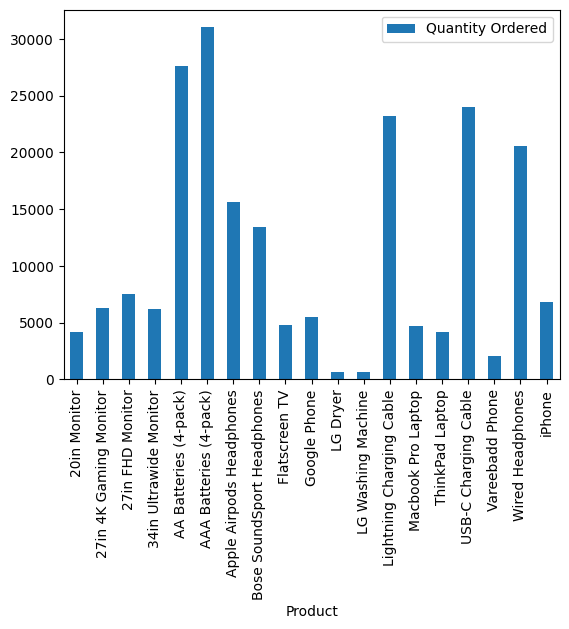

In [97]:
product_sold_count.plot(kind = 'bar')
plt.show() 

#### Make a new Bar Chart with 2 col [quantity and mean price]

In [99]:
mean_prices = all_months_data.groupby('Product')['Price Each'].mean() 
mean_prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
Product                           NaN
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [102]:
mean_prices = mean_prices.reset_index()
mean_prices.set_index('Product' , inplace = True)

In [105]:
mean_prices.drop(columns = ['index'] , inplace = True)
mean_prices

,Price Each
Product,
20in Monitor,109.99
27in 4K Gaming Monitor,389.99
27in FHD Monitor,149.99
34in Ultrawide Monitor,379.99
AA Batteries (4-pack),3.84
AAA Batteries (4-pack),2.99
Apple Airpods Headphones,150.00
Bose SoundSport Headphones,99.99
Flatscreen TV,300.00


In [108]:
mean_prices.index 

Index(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'Product', 'ThinkPad Laptop',
       'USB-C Charging Cable', 'Vareebadd Phone', 'Wired Headphones',
       'iPhone'],
      dtype='object', name='Product')

In [112]:
mean_prices.columns

Index(['Price Each'], dtype='object')

In [114]:
mean_prices.dropna(inplace = True)

In [115]:
mean_prices

,Price Each
Product,
20in Monitor,109.99
27in 4K Gaming Monitor,389.99
27in FHD Monitor,149.99
34in Ultrawide Monitor,379.99
AA Batteries (4-pack),3.84
AAA Batteries (4-pack),2.99
Apple Airpods Headphones,150.00
Bose SoundSport Headphones,99.99
Flatscreen TV,300.00


In [116]:
product_sold_count

,Quantity Ordered
Product,
20in Monitor,4129.0
27in 4K Gaming Monitor,6244.0
27in FHD Monitor,7550.0
34in Ultrawide Monitor,6199.0
AA Batteries (4-pack),27635.0
AAA Batteries (4-pack),31017.0
Apple Airpods Headphones,15661.0
Bose SoundSport Headphones,13457.0
Flatscreen TV,4819.0


In [118]:
# Make a single DF from pproduct_sold_count and mean price 
merged_df = pd.merge(left = product_sold_count , right = mean_prices , on = 'Product')
merged_df.rename(columns = {'Price Each' : 'Mean Price'} , inplace = True)

C:\Users\tipto\AppData\Local\Temp\ipykernel_11720\2161443419.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(merged_df.index, rotation=90)


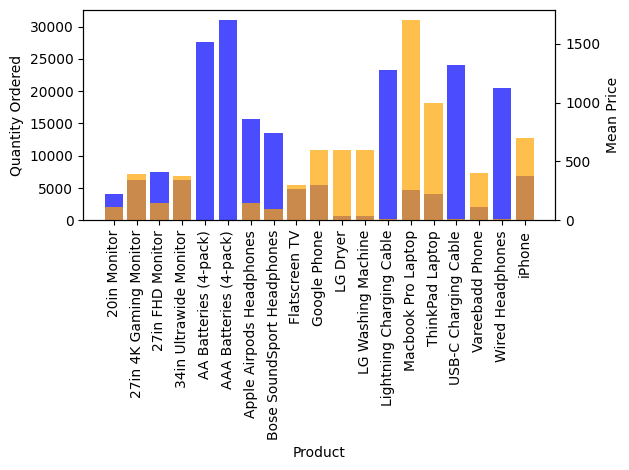

In [125]:
fig, ax1 = plt.subplots()

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plotting the bar charts
ax1.bar(merged_df.index, merged_df['Quantity Ordered'], label='Quantity Ordered', alpha=0.7, color='blue')
ax2.bar(merged_df.index, merged_df['Mean Price'], label='Mean Price', alpha=0.7, color='orange')

# Adding labels
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Mean Price')

# Rotate x-axis labels
ax1.set_xticklabels(merged_df.index, rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


In [122]:
merged_df

,Quantity Ordered,Mean Price
Product,,
20in Monitor,4129.0,109.99
27in 4K Gaming Monitor,6244.0,389.99
27in FHD Monitor,7550.0,149.99
34in Ultrawide Monitor,6199.0,379.99
AA Batteries (4-pack),27635.0,3.84
AAA Batteries (4-pack),31017.0,2.99
Apple Airpods Headphones,15661.0,150.00
Bose SoundSport Headphones,13457.0,99.99
Flatscreen TV,4819.0,300.00
